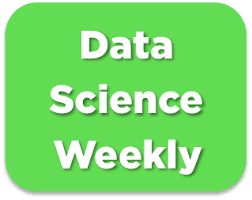

# **Data Science Weekly: predict conversion rate**

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter created by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications!

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project is cut into four steps:
- Part 1: EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2: Train a **logistic regression model** (baseline)
- Part 3 : Improve model's f1-score
- Part 4 : Analysis of best model's parameters

## **Part 1: EDA and preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd  # For working with DataFrames
import numpy as np  # For numerical operations and arrays

# Import libraries for model selection and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.model_selection import cross_val_score # For cross-validation
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning using Grid Search
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # For evaluating model performance

# Import libraries for data preprocessing
from sklearn.pipeline import Pipeline  # For creating pipelines of data transformations
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # For feature scaling and encoding
from sklearn.compose import ColumnTransformer  # For applying different transformations to different columns

# Import libraries for classification models
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier

# Import libraries for ensemble methods
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier  # For ensemble models
from xgboost import XGBClassifier  # For XGBoost classifier

# Import libraries for data visualization
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns   # For creating static plots and visualizations
import plotly.express as px  # For creating interactive plots
import plotly.graph_objects as go  # For creating more customized plots with Plotly
from plotly.subplots import make_subplots  # For creating subplots within a figure
import plotly.io as pio  # For configuring Plotly output

In [ ]:
data_file = "/content/drive/MyDrive/Colab Notebooks/Conversion_rate_project/conversion_data_train.csv" # Path to CSV file

# Load file
data = pd.read_csv(data_file)
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


### **1. EDA**

In [ ]:
# Display the first few rows of the DataFrame
data.head()

country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [ ]:
# Check missing values
data.isnull().any().any()

False

In [ ]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [ ]:
# Display summary statistics of the DataFrame
data.describe(include='all')

country            age       new_user  source  total_pages_visited  \
count   284580  284580.000000  284580.000000  284580        284580.000000   
unique       4            NaN            NaN       3                  NaN   
top         US            NaN            NaN     Seo                  NaN   
freq    160124            NaN            NaN  139477                  NaN   
mean       NaN      30.564203       0.685452     NaN             4.873252   
std        NaN       8.266789       0.464336     NaN             3.341995   
min        NaN      17.000000       0.000000     NaN             1.000000   
25%        NaN      24.000000       0.000000     NaN             2.000000   
50%        NaN      30.000000       1.000000     NaN             4.000000   
75%        NaN      36.000000       1.000000     NaN             7.000000   
max        NaN     123.000000       1.000000     NaN            29.000000   

            converted  
count   284580.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         0.032258  
std          0.176685  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

#### **1.0. Converted**

In [ ]:
converted_counts = data['converted'].value_counts()

fig = px.pie(converted_counts,
             values=converted_counts.values,
             names=converted_counts.index,
             title='Conversion Rate',
             labels={'names': 'Converted Status', 'values': 'Number of Users'})
fig.show()

- Only 3.2% of the users have subscribed to the newsletter.

#### **1.1. Age**

In [ ]:
fig_age = px.histogram(data, x="age", marginal="box")
fig_age.show()

- User ages primarily fall within the 17-60 year range, but outliers and potentially erroneous values are present.

In [ ]:
mask = (data['age'] < 70)
data = data[mask]

- Remove users with ages above 70, considered as outliers.

In [ ]:
# Display the shape of the dataframe (rows, columns)
data.shape

(284572, 6)

In [ ]:
# Group data by age and calculate conversion percentage
conversion_by_age = data.groupby('age')['converted'].mean() * 100
conversion_by_age = conversion_by_age.reset_index(name='Conversion Percentage')


# Plot the data
fig = px.bar(conversion_by_age, x='age', y='Conversion Percentage',
             title='Conversion Percentage by age',
             labels={'age': 'age', 'Conversion Percentage': 'Conversion Percentage (%)'})
fig.show()

- Conversion rates generally decline with age, but show a small resurgence around age 60.

#### **1.2. Pages visited**

In [ ]:
fig_pages_visited = px.histogram(data, x="total_pages_visited", marginal="box")
fig_pages_visited.show()

- User total pages visited primarily fall within the 1-15 page range.

In [ ]:
# Group data by total_pages_visited and calculate conversion percentage
conversion_by_pages = data.groupby('total_pages_visited')['converted'].mean() * 100
conversion_by_pages = conversion_by_pages.reset_index(name='Conversion Percentage')


# Plot the data
fig = px.bar(conversion_by_pages, x='total_pages_visited', y='Conversion Percentage',
             title='Conversion Percentage by Total Pages Visited',
             labels={'total_pages_visited': 'Total Pages Visited', 'Conversion Percentage': 'Conversion Percentage (%)'})
fig.show()

- Conversion rates increase with the number of pages visited. Beyond 20 pages, while there is a strong indication of higher conversion, observations are limited and may not be fully representative.

#### **1.3. Country**

In [ ]:
country_counts = data['country'].value_counts()

fig = px.bar(country_counts,
             x=country_counts.index,
             y=country_counts.values,
             title='Country Counts',
             labels={'x': 'Country', 'y': 'Number of Users'})
fig.show()

- The US accounts for the largest proportion of users, while Germany has the smallest user base in the datase.

In [ ]:
# Group data by country and calculate conversion percentage
conversion_by_country = data.groupby('country')['converted'].mean() * 100
conversion_by_country = conversion_by_country.reset_index(name='Conversion Percentage')

# Create the bar chart
fig = px.bar(conversion_by_country,
             x='country',
             y='Conversion Percentage',
             text=conversion_by_country['Conversion Percentage'].apply(lambda x: f'{x:.2f}%'),  # Add percentage labels
             title='Conversion Rate by Country',
             labels={'country': 'Country', 'Conversion Percentage': 'Conversion Percentage (%)'})

fig.update_traces(textposition='outside') # Position labels outside the bars for better visibility
fig.show()

- Germany, with the lowest number of users, stands out with the highest conversion rate compared to other countries.

In [ ]:
# Group data and get counts
grouped_data = data.groupby(['country', 'converted'])['converted'].count().reset_index(name='Count')

# Get unique countries
countries = grouped_data['country'].unique()
num_countries = len(countries)

# Create subplots
fig = make_subplots(rows=1, cols=num_countries, specs=[[{'type':'domain'}]*num_countries])

# Add pie charts to subplots
for i, country in enumerate(countries):
    country_data = grouped_data[grouped_data['country'] == country]
    fig.add_trace(go.Pie(labels=country_data['converted'], values=country_data['Count'], name=country),
                  row=1, col=i+1)


# Adjust annotation positions for better alignment
fig.update_layout(title_text="Conversion Rate by Country",
                  annotations=[dict(text=country, x=0.08 + i * 0.28, y=0.15, font_size=12, showarrow=False)
                               for i, country in enumerate(countries)])
fig.show()

#### **1.4. Source**

In [ ]:
source_counts = data['source'].value_counts()
fig = px.bar(source_counts,
             x=source_counts.index,
             y=source_counts.values,
             title='Source Counts',
             labels={'x': 'Source', 'y': 'Number of Users'})
fig.show()

- Seo (Search engine optimization) is the most common user source, followed by Ads and Direct.

In [ ]:
# Calculate the conversion rate for each source
conversion_rates = data.groupby('source')['converted'].mean() * 100
conversion_rates = conversion_rates.reset_index(name='Conversion Rate (%)')

# Create the bar chart with percentage labels
fig = px.bar(conversion_rates,
             x='source',
             y='Conversion Rate (%)',
             text=conversion_rates['Conversion Rate (%)'].apply(lambda x: f'{x:.2f}%'),  # Add percentage labels
             title='Conversion Rate by Source',
             labels={'source': 'Source', 'Conversion Rate (%)': 'Conversion Rate (%)'})

fig.update_traces(textposition='outside') # Position labels outside the bars for better visibility
fig.show()

- Ads have the highest conversion rate, closely followed by SEO.

In [ ]:
# Group data and get counts
grouped_data = data.groupby(['source', 'converted'])['converted'].count().reset_index(name='Count')

# Get unique sources
sources = grouped_data['source'].unique()
num_sources = len(sources)

# Create subplots
fig = make_subplots(rows=1, cols=num_sources, specs=[[{'type':'domain'}]*num_sources])

# Add pie charts to subplots
for i, source in enumerate(sources):
    source_data = grouped_data[grouped_data['source'] == source]
    fig.add_trace(go.Pie(labels=source_data['converted'], values=source_data['Count'], name=source),
                  row=1, col=i+1)


# Adjust annotation positions for better alignment
fig.update_layout(title_text="Conversion Rate by Source",
                  annotations=[dict(text=source, x=0.12 + i * 0.38, y=0.08, font_size=12, showarrow=False)
                               for i, source in enumerate(sources)])
fig.show()

#### **1.5. New users**

In [ ]:
data['new_user'].value_counts()

new_user
1    195062
0     89510
Name: count, dtype: int64

In [ ]:
new_user_counts = data['new_user'].value_counts()
fig = px.bar(new_user_counts,
             x=new_user_counts.index,
             y=new_user_counts.values,
             title='New user Counts',
             labels={'x': 'New users', 'y': 'Number of Users'})
fig.show()

- New users subscribe to the newsletter at twice the rate of returning users.

In [ ]:
# Group data and get counts
grouped_data = data.groupby(['new_user', 'converted'])['converted'].count().reset_index(name='Count')

# Create pie charts for new_user
for new_user in grouped_data['new_user'].unique():
    new_user_data = grouped_data[grouped_data['new_user'] == new_user]

    # Set the title based on new_user value
    if new_user == 0:
        title = 'Conversion Rate in Old Users'
    else:
        title = 'Conversion Rate in New Users'

    fig = px.pie(new_user_data, values='Count', names='converted',
                 title=title,
                 labels={'converted': 'Converted Status', 'Count': 'Number of Users'})
    fig.show()

#### **1.6. Correlation between features**

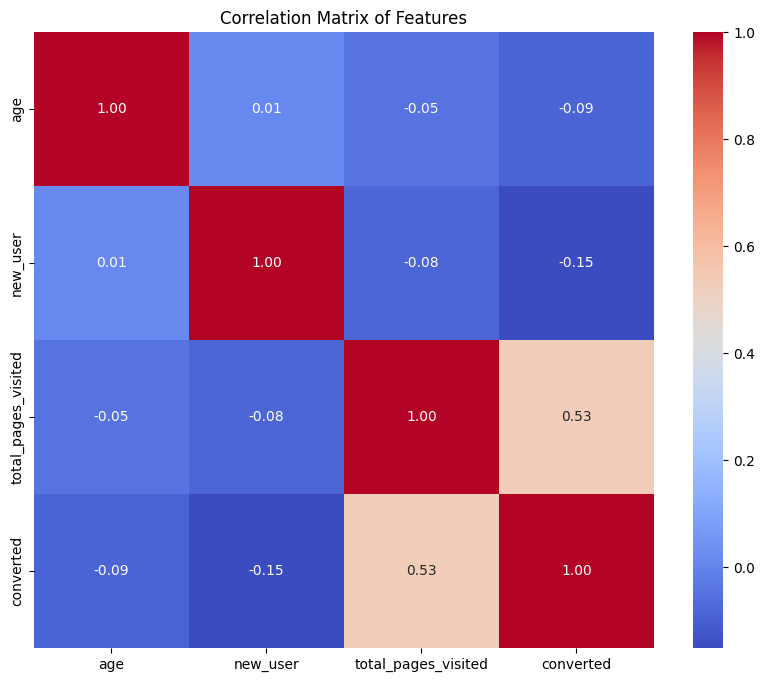

In [ ]:
# Create a copy of the DataFrame
data_for_corr = data.copy()

# Drop the 'country' column
data_for_corr = data_for_corr.drop(['country', 'source'], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_for_corr.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

- Total pages visited is the feature that correlates the most with converted but Country is not represented here.

### **2. Preprocessing**

#### **2.1. Test Train Split**

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "converted"

X = data.drop(target_variable, axis=1)
Y = data.loc[:, target_variable]

print("...Done.")
print()

print("Y : ")
print(Y.head())
print()
print("X :")
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

X :
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3


In [ ]:
# Divide dataset Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



#### **2.2. Standardizing and one-hot encoding**

In [ ]:
numeric_features = [1,4]
categorical_features = [0,2,3]

In [ ]:
# Create pipeline for numeric features
numeric_transformer = StandardScaler()

In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

In [ ]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(
    drop="first"
)  # no missing values in categorical data, so we only need the OHE

In [ ]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all the results.
print("...Done.")
print(
    X_test[0:5, :]
)  # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
       country  age  new_user  source  total_pages_visited
14455       US   35         1     Ads                    5
144289      UK   23         0     Seo                    6
134253      UK   29         0     Seo                    1
215430      US   20         0     Seo                    4
75497       US   30         0  Direct                    2
...Done.
[[ 0.53867907  0.03846278  0.          0.          1.          1.
   0.          0.        ]
 [-0.91475264  0.33763535  0.          1.          0.          0.
   0.          1.        ]
 [-0.18803679 -1.15822751  0.          1.          0.          0.
   0.          1.        ]
 [-1.27811057 -0.2607098   0.          0.          1.          0.
   0.          1.        ]
 [-0.06691748 -0.85905494  0.          0.          1.          0.
   1.          0.        ]]

Performing preprocessings on test set...
       country  age  new_user  source  total_pages_visited
185864      US   33         

## **Part 2: Train a logistic regression model (baseline)**

### **1. Train Model**

In [ ]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


### **2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = classifier.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.99472677e-01 5.27323320e-04]
 [9.80768530e-01 1.92314702e-02]
 [9.99709098e-01 2.90902297e-04]
 ...
 [9.99820070e-01 1.79929562e-04]
 [9.99948323e-01 5.16772275e-05]
 [9.99852595e-01 1.47405498e-04]]



In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = classifier.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.99415758e-01 5.84242228e-04]
 [9.99141618e-01 8.58382149e-04]
 [9.99940124e-01 5.98761551e-05]
 ...
 [9.98827141e-01 1.17285879e-03]
 [9.99686829e-01 3.13170763e-04]
 [9.48935324e-01 5.10646756e-02]]



### **3. Metrics**

In [ ]:
# Here, the f1-score will be used to assess the performances on the leaderboard
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8545, Recall: 0.6870, f1-score: 0.7617
Test Set - Precision: 0.8716, Recall: 0.7026, f1-score: 0.7780


- The base model gave already a good f1 score (0.778 for the test set).

### **4. Confusion Matrix**

In [ ]:
# Check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246888    966]
 [  2585   5675]]

Confusion matrix on test set : 
[[27445    95]
 [  273   645]]



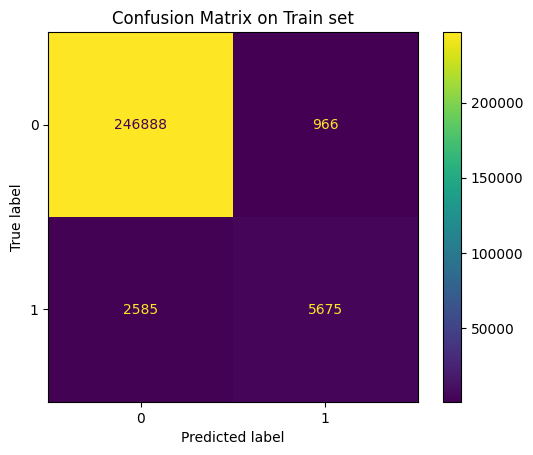

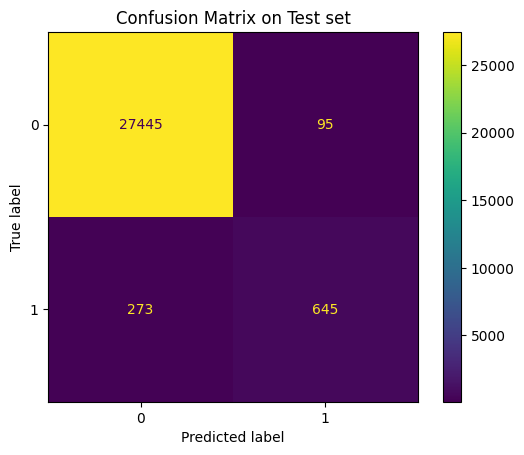

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

- There is also a good level of TP and TN.

### **5. Feature importance**

In [ ]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': classifier.coef_[0]})

# Add a column for absolute coefficient values
coef_df['Absolute Coefficient'] = abs(coef_df['Coefficient'])

# Sort the DataFrame by absolute coefficient values in descending order
coef_df = coef_df.sort_values(by=['Absolute Coefficient'], ascending=False)

# Reset index
coef_df = coef_df.reset_index(drop=True)
print(coef_df)

                    Feature  Coefficient  Absolute Coefficient
0      cat__country_Germany     3.563688              3.563688
1           cat__country_UK     3.372937              3.372937
2           cat__country_US     3.052921              3.052921
3  num__total_pages_visited     2.519372              2.519372
4           cat__new_user_1    -1.702733              1.702733
5                  num__age    -0.607952              0.607952
6        cat__source_Direct    -0.248780              0.248780
7           cat__source_Seo    -0.044711              0.044711


In [ ]:
# Create the bar chart
fig = px.bar(coef_df, x='Feature', y='Coefficient',
             title='Logistic Regression Coefficients',
             labels={'Feature': 'Feature', 'Coefficient': 'Coefficient Value'})
fig.show()

- Among the features analyzed, country exerts the strongest influence on conversion rate, followed by total pages visited, while age and source have minimal impact

### **6. Store Metrics**

In [ ]:
scores_df = pd.DataFrame(columns = ['model', 'set', 'f1-score', 'precision', 'recall'])

In [ ]:
new_rows = [
    {'model': 'logistic_regression', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'logistic_regression', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

<ipython-input-188-f7b385f7ecea>:6: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



model    set  f1-score  precision    recall
0  logistic_regression  train  0.761694   0.854540  0.687046
1  logistic_regression   test  0.778046   0.871622  0.702614

##**Part 3: Improve model's f1-score**


### **1. Random forest with grid seach**


#### **1.1. Train Model**

In [ ]:
# Perform grid search
print("Grid search...")
random_forest = RandomForestClassifier(random_state=0)

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [20, 60, 100]
}

random_forest_gridsearch = GridSearchCV(random_forest, param_grid = params, cv = 3) # 3-fold cross-validation
random_forest_gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", random_forest_gridsearch.best_params_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
print("Best validation score : ", random_forest_gridsearch.best_score_)
print("Best estimator : ", random_forest_gridsearch.best_estimator_)
print("Accuracy on training set : ", random_forest_gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", random_forest_gridsearch.score(X_test, Y_test))

Best validation score :  0.9859945188127588
Best estimator :  RandomForestClassifier(max_depth=8, random_state=0)
Accuracy on training set :  0.9864044917497676
Accuracy on test set :  0.9861198959870686


#### **1.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = random_forest_gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = random_forest_gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



In [ ]:
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8730, Recall: 0.6769, f1-score: 0.7625
Test Set - Precision: 0.8657, Recall: 0.6743, f1-score: 0.7581


#### **1.3. Confusion Matrix**

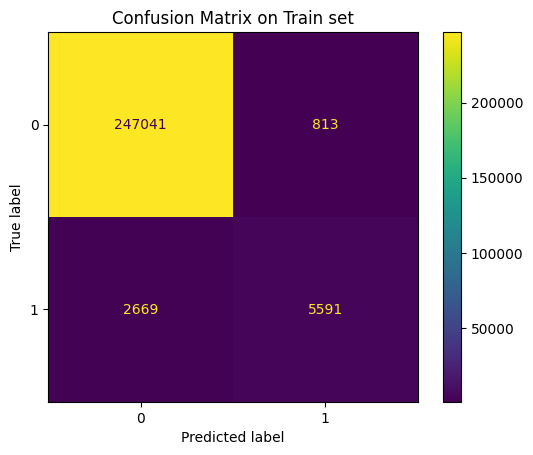

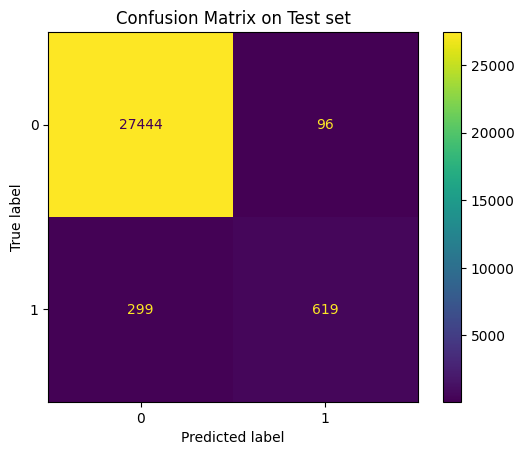

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_forest_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_forest_gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **1.4. Store Metrics**

In [ ]:
new_rows = [
    {'model': 'random_forest', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'random_forest', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0  logistic_regression  train  0.761694   0.854540  0.687046
1  logistic_regression   test  0.778046   0.871622  0.702614
2        random_forest  train  0.762548   0.873048  0.676877
3        random_forest   test  0.758114   0.865734  0.674292

### **2. Bagging on decision tree**

#### **2.1. Train Model**

In [ ]:
print('Training Bagging of decision tree...')
decision_tree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 1, min_samples_split = 2) # Same hyperparameters as best RF model
bagging_dt = BaggingClassifier(estimator=decision_tree, n_estimators = 100, random_state=0)
bagging_dt.fit(X_train, Y_train)
print("...Done.")
print("Accuracy on training set : ", bagging_dt.score(X_train, Y_train))
print("Accuracy on test set : ", bagging_dt.score(X_test, Y_test))

Training Bagging of decision tree...
...Done.
Accuracy on training set :  0.9866270488922901
Accuracy on test set :  0.9859793379717479


#### **2.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = bagging_dt.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = bagging_dt.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



#### **2.3. Metrics**

In [ ]:
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8607, Recall: 0.6984, f1-score: 0.7711
Test Set - Precision: 0.8512, Recall: 0.6852, f1-score: 0.7592


#### **2.4. Confusion Matrix**

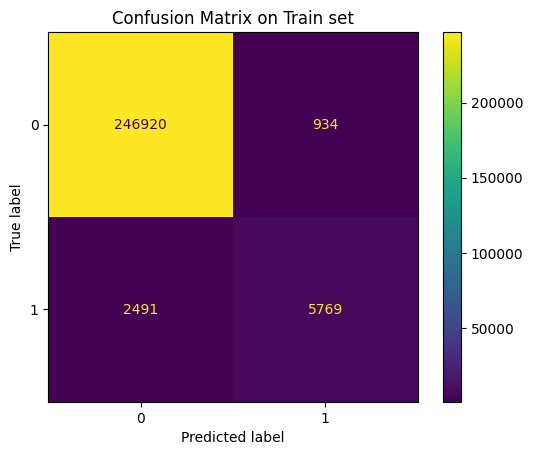

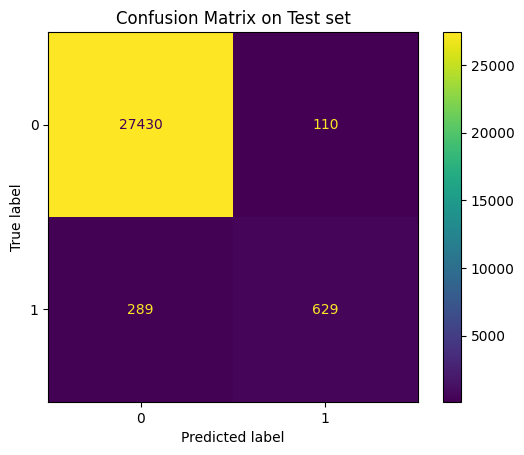

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_dt, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_dt, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **2.4. Store Metrics**

In [ ]:
new_rows = [
    {'model': 'bagging_decision_tree', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'bagging_decision_tree', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0    logistic_regression  train  0.761694   0.854540  0.687046
1    logistic_regression   test  0.778046   0.871622  0.702614
2          random_forest  train  0.762548   0.873048  0.676877
3          random_forest   test  0.758114   0.865734  0.674292
4  bagging_decision_tree  train  0.771102   0.860659  0.698426
5  bagging_decision_tree   test  0.759203   0.851150  0.685185

### **3. Bagging on logistic regression with grid seach**

#### **3.1. Train Model**

In [ ]:
# Perform grid search
print("Grid search...")
logistic_regression = LogisticRegression(max_iter = 1000)
bagging_logreg = BaggingClassifier(logistic_regression, random_state=0)

# Grid of values to be tested
params = {
    'estimator__C': [0.1, 0.5, 1.0, 1.5],
    'n_estimators': [2, 5, 10]
}
print(params)
bagging_logreg_gridsearch = GridSearchCV(bagging_logreg, param_grid = params, cv = 3, verbose = 1) # cv : the number of folds to be used for CV
bagging_logreg_gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", bagging_logreg_gridsearch.best_params_)
print("Best validation accuracy : ", bagging_logreg_gridsearch.best_score_)
print()
print("Accuracy on training set : ", bagging_logreg_gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", bagging_logreg_gridsearch.score(X_test, Y_test))

Grid search...
{'estimator__C': [0.1, 0.5, 1.0, 1.5], 'n_estimators': [2, 5, 10]}
Fitting 3 folds for each of 12 candidates, totalling 36 fits
...Done.
Best hyperparameters :  {'estimator__C': 1.5, 'n_estimators': 2}
Best validation accuracy :  0.9861311764633721

Accuracy on training set :  0.9861038443817988
Accuracy on test set :  0.9870686625904842


#### **3.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = bagging_logreg_gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = bagging_logreg_gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



#### **3.3. Metrics**

In [ ]:
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8537, Recall: 0.6868, f1-score: 0.7612
Test Set - Precision: 0.8716, Recall: 0.7026, f1-score: 0.7780


#### **3.4. Confusion Matrix**

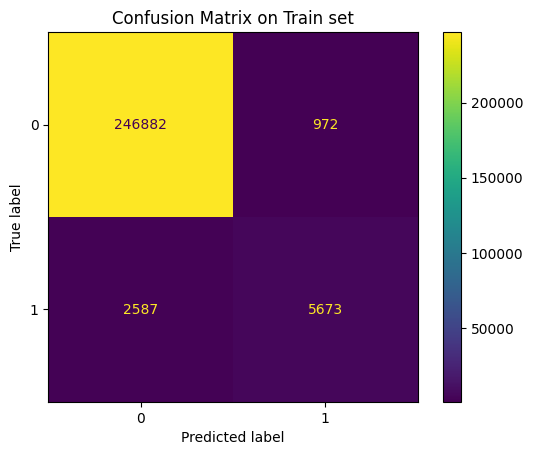

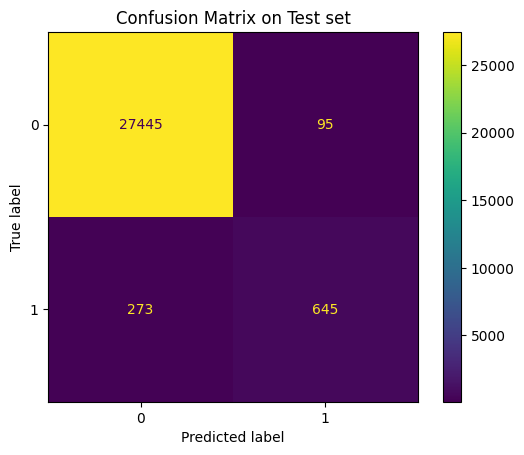

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_logreg_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_logreg_gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **3.5. Store Metrics**

In [ ]:
new_rows = [
    {'model': 'bagging_logistic_regression', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'bagging_logistic_regression', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0          logistic_regression  train  0.761694   0.854540  0.687046
1          logistic_regression   test  0.778046   0.871622  0.702614
2                random_forest  train  0.762548   0.873048  0.676877
3                random_forest   test  0.758114   0.865734  0.674292
4        bagging_decision_tree  train  0.771102   0.860659  0.698426
5        bagging_decision_tree   test  0.759203   0.851150  0.685185
6  bagging_logistic_regression  train  0.761221   0.853725  0.686804
7  bagging_logistic_regression   test  0.778046   0.871622  0.702614

### **4. Adaboost on Decision tree with grid seach**


#### **4.1. Train Model**

In [ ]:
# Perform grid search
print("Grid search...")
decision_tree = DecisionTreeClassifier()
adaboost_dt = AdaBoostClassifier(decision_tree, random_state=0)

# Grid of values to be tested
params = {
    'estimator__max_depth': [2, 4, 6],
    'estimator__min_samples_leaf': [1, 2, 3],
    'estimator__min_samples_split': [2, 4, 6],
    'n_estimators': [4, 6, 8]
}
print(params)
adaboost_dt_gridsearch = GridSearchCV(adaboost_dt, param_grid = params, cv = 3, verbose = 1) # cv : the number of folds to be used for CV
adaboost_dt_gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", adaboost_dt_gridsearch.best_params_)
print("Best validation accuracy : ", adaboost_dt_gridsearch.best_score_)
print()
print("Accuracy on training set : ", adaboost_dt_gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", adaboost_dt_gridsearch.score(X_test, Y_test))


Grid search...
{'estimator__max_depth': [2, 4, 6], 'estimator__min_samples_leaf': [1, 2, 3], 'estimator__min_samples_split': [2, 4, 6], 'n_estimators': [4, 6, 8]}
Fitting 3 folds for each of 81 candidates, totalling 243 fits
...Done.
Best hyperparameters :  {'estimator__max_depth': 6, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'n_estimators': 8}
Best validation accuracy :  0.9854752182951888

Accuracy on training set :  0.9856626346080262
Accuracy on test set :  0.985838779956427


#### **4.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = adaboost_dt_gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = adaboost_dt_gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



#### **4.3. Metrics**

In [ ]:
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8639, Recall: 0.6593, f1-score: 0.7479
Test Set - Precision: 0.8663, Recall: 0.6634, f1-score: 0.7514


#### **4.4. Confusion Matrix**

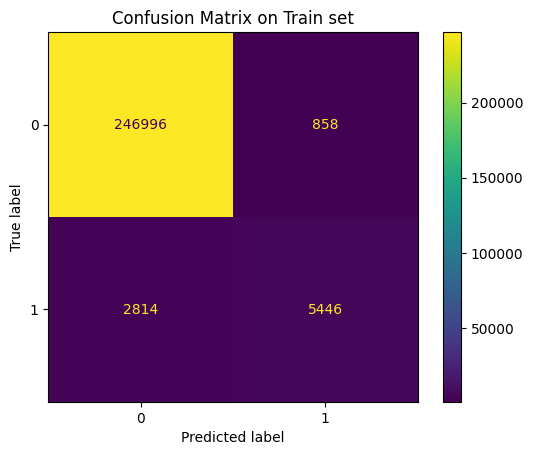

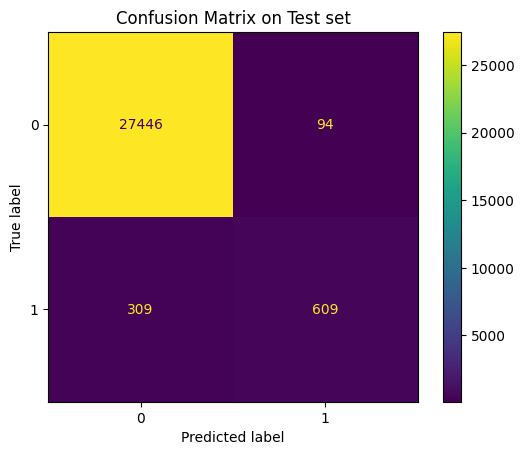

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(adaboost_dt_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(adaboost_dt_gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **4.5. Store Metrics**

In [ ]:
new_rows = [
    {'model': 'adaboost_decision_tree', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'adaboost_decision_tree', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0          logistic_regression  train  0.761694   0.854540  0.687046
1          logistic_regression   test  0.778046   0.871622  0.702614
2                random_forest  train  0.762548   0.873048  0.676877
3                random_forest   test  0.758114   0.865734  0.674292
4        bagging_decision_tree  train  0.771102   0.860659  0.698426
5        bagging_decision_tree   test  0.759203   0.851150  0.685185
6  bagging_logistic_regression  train  0.761221   0.853725  0.686804
7  bagging_logistic_regression   test  0.778046   0.871622  0.702614
8       adaboost_decision_tree  train  0.747871   0.863896  0.659322
9       adaboost_decision_tree   test  0.751388   0.866287  0.663399

### **5. Gradient Boost with grid seach**

#### **5.1. Train Model**

In [ ]:
# Perform grid search
print("Grid search...")
gradientboost = GradientBoostingClassifier(random_state=0)

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [14, 16, 18]
}
print(params)
gradientboost_gridsearch = GridSearchCV(gradientboost, param_grid = params, cv = 3, verbose = 1) # cv : the number of folds to be used for CV
gradientboost_gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gradientboost_gridsearch.best_params_)
print("Best validation accuracy : ", gradientboost_gridsearch.best_score_)
print()
print("Accuracy on training set : ", gradientboost_gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gradientboost_gridsearch.score(X_test, Y_test))


Grid search...
{'max_depth': [4, 6, 8, 10], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [2, 4, 6], 'n_estimators': [14, 16, 18]}
Fitting 3 folds for each of 108 candidates, totalling 324 fits
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 18}
Best validation accuracy :  0.9857290121986844

Accuracy on training set :  0.9868144654333617
Accuracy on test set :  0.9859090589640874


#### **5.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gradientboost_gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gradientboost_gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



#### **5.3. Metrics**

In [ ]:
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8842, Recall: 0.6803, f1-score: 0.7689
Test Set - Precision: 0.8656, Recall: 0.6667, f1-score: 0.7532


#### **5.4. Confusion Matrix**

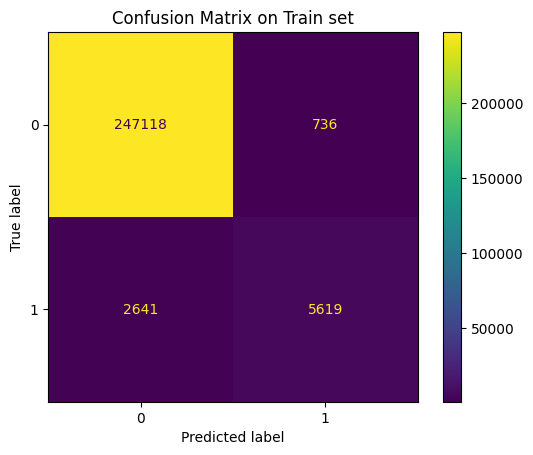

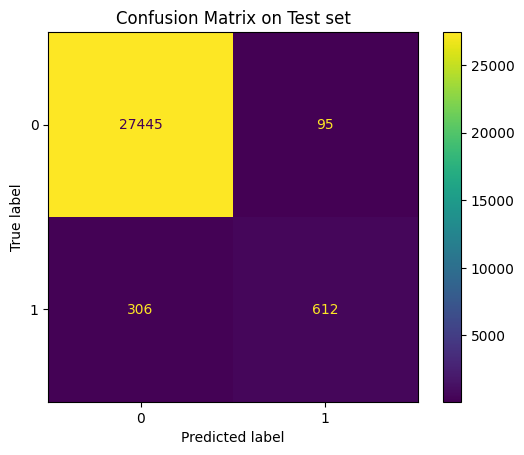

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gradientboost_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gradientboost_gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **5.5. Store metrics**

In [ ]:
new_rows = [
    {'model': 'Gradientboost', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'Gradientboost', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0           logistic_regression  train  0.761694   0.854540  0.687046
1           logistic_regression   test  0.778046   0.871622  0.702614
2                 random_forest  train  0.762548   0.873048  0.676877
3                 random_forest   test  0.758114   0.865734  0.674292
4         bagging_decision_tree  train  0.771102   0.860659  0.698426
5         bagging_decision_tree   test  0.759203   0.851150  0.685185
6   bagging_logistic_regression  train  0.761221   0.853725  0.686804
7   bagging_logistic_regression   test  0.778046   0.871622  0.702614
8        adaboost_decision_tree  train  0.747871   0.863896  0.659322
9        adaboost_decision_tree   test  0.751388   0.866287  0.663399
10                Gradientboost  train  0.768936   0.884186  0.680266
11                Gradientboost   test  0.753231   0.865629  0.666667

### **6. XGboost with grid seach**


#### **6.1. Train Model**

In [ ]:
# Perform grid search
print("Grid search...")
xgboost = XGBClassifier(random_state=0)

# Grid of values to be tested
params = {
    'max_depth': [6, 8, 10],
    'min_child_weight': [6, 8, 10],
    'n_estimators': [10, 12, 14]
}
print(params)
xgboost_gridsearch = GridSearchCV(xgboost, param_grid = params, cv = 3, verbose = 1) # cv : the number of folds to be used for CV
xgboost_gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", xgboost_gridsearch.best_params_)
print("Best validation accuracy : ", xgboost_gridsearch.best_score_)
print()
print("Accuracy on training set : ", xgboost_gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", xgboost_gridsearch.score(X_test, Y_test))

Grid search...
{'max_depth': [6, 8, 10], 'min_child_weight': [6, 8, 10], 'n_estimators': [10, 12, 14]}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_child_weight': 8, 'n_estimators': 12}
Best validation accuracy :  0.9860335637577867

Accuracy on training set :  0.986384969193406
Accuracy on test set :  0.9861550354908989


#### **6.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = xgboost_gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = xgboost_gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



#### **6.3. Metrics**

In [ ]:
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8566, Recall: 0.6941, f1-score: 0.7668
Test Set - Precision: 0.8531, Recall: 0.6895, f1-score: 0.7627


#### **6.4. Confusion Matrix**

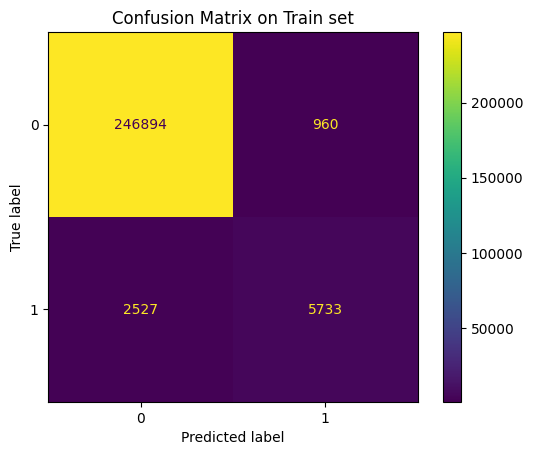

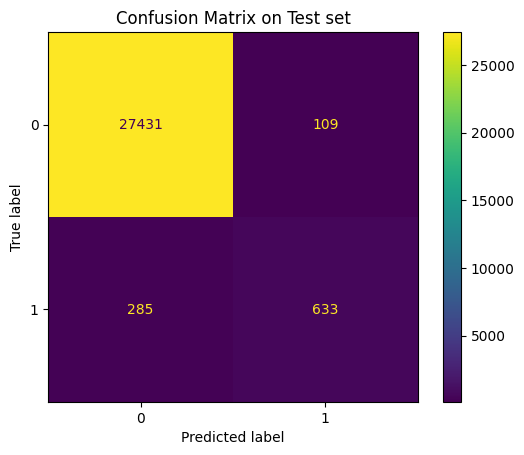

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgboost_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgboost_gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **6.5. Store metrics**

In [ ]:
new_rows = [
    {'model': 'XGboost', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'XGboost', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0           logistic_regression  train  0.761694   0.854540  0.687046
1           logistic_regression   test  0.778046   0.871622  0.702614
2                 random_forest  train  0.762548   0.873048  0.676877
3                 random_forest   test  0.758114   0.865734  0.674292
4         bagging_decision_tree  train  0.771102   0.860659  0.698426
5         bagging_decision_tree   test  0.759203   0.851150  0.685185
6   bagging_logistic_regression  train  0.761221   0.853725  0.686804
7   bagging_logistic_regression   test  0.778046   0.871622  0.702614
8        adaboost_decision_tree  train  0.747871   0.863896  0.659322
9        adaboost_decision_tree   test  0.751388   0.866287  0.663399
10                Gradientboost  train  0.768936   0.884186  0.680266
11                Gradientboost   test  0.753231   0.865629  0.666667
12                      XGboost  train  0.766803   0.856567  0.694068
13                      XGboost   test  0.762651   0.853100  0.689542

### **7. Voting**

#### **7.1. Train Model**

In [ ]:
# Voting
voting = VotingClassifier(
    estimators=[("logistic_regression", classifier),
                ("random_forest", random_forest_gridsearch),
                ("bagging_decision_tree", bagging_dt),
                ("bagging_logistic_regression", bagging_logreg_gridsearch),
                ("adaboost_decision_tree", adaboost_dt_gridsearch),
                ("Gradientboost", gradientboost_gridsearch),
                ("XGboost", xgboost_gridsearch)],
    voting="hard"
)  # soft: if want to use probabilities for voting

print("Fitting Voting Classifier...")
voting.fit(X_train, Y_train)
print("...Done.")

Fitting Voting Classifier...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
...Done.


TypeError: cannot unpack non-iterable LogisticRegression object

In [ ]:
# Print accuracy for each individual estimator
for name, estimator in voting.named_estimators_.items(): # Use named_estimators_.items() to iterate through name-estimator pairs
    print(f"{name} accuracy on training set: {estimator.score(X_train, Y_train):.4f}")
    print(f"{name} accuracy on test set: {estimator.score(X_test, Y_test):.4f}")
    print("-" * 20)  # Separator for readability

print("Overall Voting Classifier accuracy on training set : ", voting.score(X_train, Y_train))
print("Overall Voting Classifier accuracy on test set : ", voting.score(X_test, Y_test))

logistic_regression accuracy on training set: 0.9861
logistic_regression accuracy on test set: 0.9871
--------------------
random_forest accuracy on training set: 0.9864
random_forest accuracy on test set: 0.9861
--------------------
bagging_decision_tree accuracy on training set: 0.9866
bagging_decision_tree accuracy on test set: 0.9860
--------------------
bagging_logistic_regression accuracy on training set: 0.9861
bagging_logistic_regression accuracy on test set: 0.9871
--------------------
adaboost_decision_tree accuracy on training set: 0.9857
adaboost_decision_tree accuracy on test set: 0.9858
--------------------
Gradientboost accuracy on training set: 0.9868
Gradientboost accuracy on test set: 0.9859
--------------------
XGboost accuracy on training set: 0.9864
XGboost accuracy on test set: 0.9862
--------------------
Overall Voting Classifier accuracy on training set :  0.9865255315992097
Overall Voting Classifier accuracy on test set :  0.9863658725138801


In [ ]:
'''
# Voting
voting = VotingClassifier(
    estimators=[("logistic_regression", classifier), ("random_forest", random_forest_gridsearch), ("bagging_decision_tree", bagging_dt), ("bagging_logistic_regression", bagging_logreg_gridsearch), ("adaboost_decision_tree", adaboost_dt_gridsearch), ("Gradientboost", gradientboost_gridsearch), ("XGboost", xgboost_gridsearch)],
    voting="soft"
)  # soft: use probabilities for voting
voting.fit(X_train, Y_train)
print("Accuracy on training set : ", voting.score(X_train, Y_train))
print("Accuracy on test set : ", voting.score(X_test, Y_test))
'''

#### **7.2. Evaluate Model**

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = voting.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = voting.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



#### **7.3. Metrics**

In [ ]:
# Here, the f1-score will be used to assess the performances on the leaderboard
# Calculate and print metrics for the train set
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train, Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)
print(f"Train Set - Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, f1-score: {f1_train:.4f}")

# Calculate and print metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
print(f"Test Set - Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, f1-score: {f1_test:.4f}")

Train Set - Precision: 0.8634, Recall: 0.6916, f1-score: 0.7680
Test Set - Precision: 0.8601, Recall: 0.6895, f1-score: 0.7654


#### **7.4. Confusion Matrix**

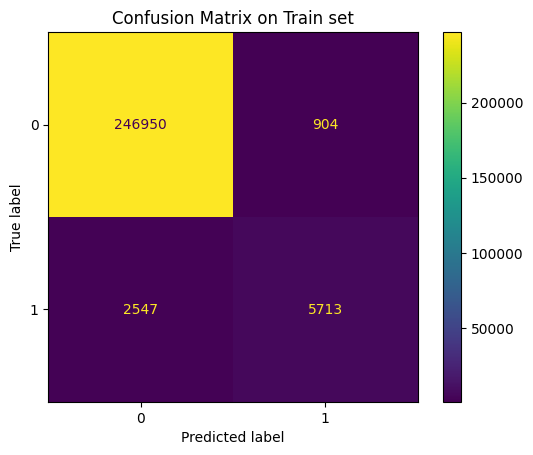

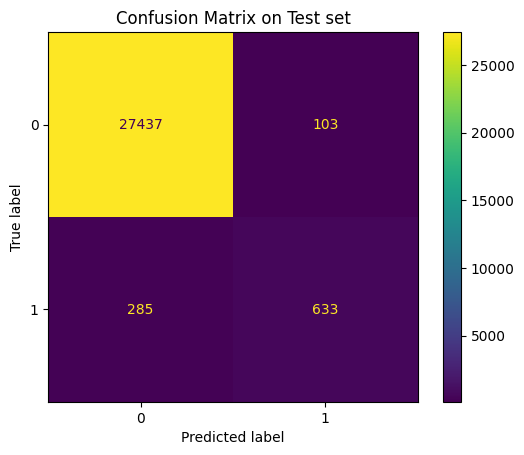

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(voting, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(voting, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### **7.5. Store metrics**

In [ ]:
new_rows = [
    {'model': 'Voting', 'set': 'train', 'f1-score': f1_score(Y_train, Y_train_pred), 'precision': precision_score(Y_train, Y_train_pred), 'recall' : recall_score(Y_train, Y_train_pred)},
    {'model': 'Voting', 'set': 'test', 'f1-score': f1_score(Y_test, Y_test_pred), 'precision': precision_score(Y_test, Y_test_pred), 'recall' : recall_score(Y_test, Y_test_pred)}
]

scores_df = pd.concat([scores_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_df

model    set  f1-score  precision    recall
0           logistic_regression  train  0.761694   0.854540  0.687046
1           logistic_regression   test  0.778046   0.871622  0.702614
2                 random_forest  train  0.762548   0.873048  0.676877
3                 random_forest   test  0.758114   0.865734  0.674292
4         bagging_decision_tree  train  0.771102   0.860659  0.698426
5         bagging_decision_tree   test  0.759203   0.851150  0.685185
6   bagging_logistic_regression  train  0.761221   0.853725  0.686804
7   bagging_logistic_regression   test  0.778046   0.871622  0.702614
8        adaboost_decision_tree  train  0.747871   0.863896  0.659322
9        adaboost_decision_tree   test  0.751388   0.866287  0.663399
10                Gradientboost  train  0.768936   0.884186  0.680266
11                Gradientboost   test  0.753231   0.865629  0.666667
12                      XGboost  train  0.766803   0.856567  0.694068
13                      XGboost   test  0.762651   0.853100  0.689542
14                       Voting  train  0.768031   0.863382  0.691646
15                       Voting   test  0.765417   0.860054  0.689542

### **8. Compare models**

In [ ]:
scores_df = scores_df.sort_values(by = ['set', 'f1-score'], ascending = False)
scores_df

model    set  f1-score  precision    recall
4         bagging_decision_tree  train  0.771102   0.860659  0.698426
10                Gradientboost  train  0.768936   0.884186  0.680266
14                       Voting  train  0.768031   0.863382  0.691646
12                      XGboost  train  0.766803   0.856567  0.694068
2                 random_forest  train  0.762548   0.873048  0.676877
0           logistic_regression  train  0.761694   0.854540  0.687046
6   bagging_logistic_regression  train  0.761221   0.853725  0.686804
8        adaboost_decision_tree  train  0.747871   0.863896  0.659322
1           logistic_regression   test  0.778046   0.871622  0.702614
7   bagging_logistic_regression   test  0.778046   0.871622  0.702614
15                       Voting   test  0.765417   0.860054  0.689542
13                      XGboost   test  0.762651   0.853100  0.689542
5         bagging_decision_tree   test  0.759203   0.851150  0.685185
3                 random_forest   test  0.758114   0.865734  0.674292
11                Gradientboost   test  0.753231   0.865629  0.666667
9        adaboost_decision_tree   test  0.751388   0.866287  0.663399

In [ ]:
fig = px.bar(scores_df, x="model", y='f1-score', color='set', barmode='group', width=900,
             text='f1-score')

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')  # Format and position text
fig.show()

- The logistic regression model, used as a baseline, surprisingly yielded the best f1-score on the test set

### **8. Make predictions on the challenge test set**

#### **7.0. Preprocessing challenge test set**

In [ ]:
# Concatenate train and test set to train the best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

In [ ]:
# Merge data without labels and labels
data_without_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conversion_rate_project/conversion_data_test.csv')
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conversion_rate_project/conversion_data_test_labels.csv')
merged_data_test = pd.concat([data_without_labels, labels], axis=1)

print('Prediction set (without labels) :', merged_data_test.shape)

mask = (merged_data_test['age'] < 70)
data_test = merged_data_test[mask]

# Check consistency of features_list (must be the same than the features
# used by the best classifier)
#features_list = ['country', 'age', 'total_pages_visited', 'new_user', 'source']
features_list = [0, 1, 2, 3, 4]
X_data_test = data_test.iloc[:, features_list]
#label
y_data_test = data_test.iloc[:, -1]

# Convert pandas DataFrames to arrays before using scikit-learn
print("Convert pandas DataFrames to arrays...")
X_data_test = X_data_test.values
y_data_test = y_data_test.values
print("...Done")

print(X_data_test[0:5,:])
print(y_data_test[0:5])

Prediction set (without labels) : (31620, 6)
Convert pandas DataFrames to arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]
[1 0 0 0 0]


In [ ]:
# Save the merged DataFrame to a new CSV file
merged_data_test.to_csv('merged_data_test.csv', index=False)

In [ ]:
print("Encoding categorical features and standardizing numerical features...")

X_data_test = preprocessor.transform(X_data_test)
print("...Done")
print(X_data_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.3091561   3.32936106  0.          1.          0.          0.
   0.          1.        ]
 [-1.03587195  0.03846278  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17532114 -1.15822751  0.          0.          0.          1.
   0.          1.        ]
 [ 0.17532114  0.33763535  0.          0.          1.          1.
   0.          0.        ]
 [-0.67251403 -0.55988237  0.          0.          0.          0.
   0.          1.        ]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



#### **7.1. Logistic regression**

In [ ]:
#classifier.fit(X,Y)

y_pred = classifier.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7537960954446855

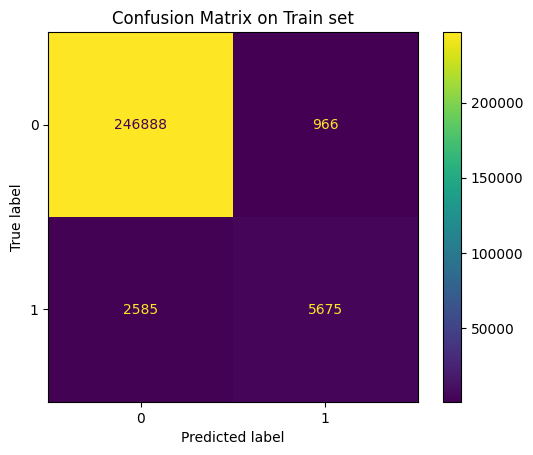

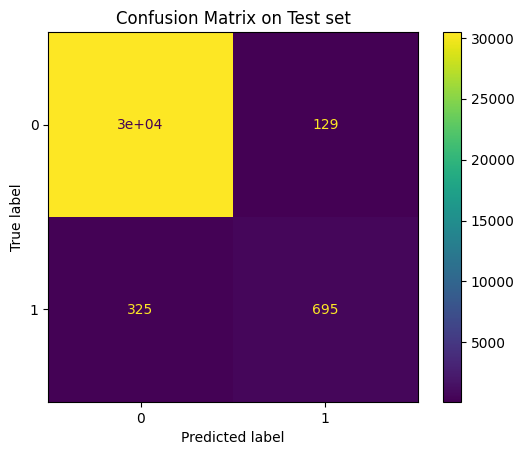

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
scores_challenge_df = pd.DataFrame(columns = ['model', 'set', 'f1-score', 'precision', 'recall'])

In [ ]:
new_rows = [
    {'model': 'logistic_regression', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

<ipython-input-235-481f642e7848>:5: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



model   set  f1-score  precision    recall
0  logistic_regression  test  0.753796   0.843447  0.681373

In [ ]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': classifier.coef_[0]})

# Add a column for absolute coefficient values
coef_df['Absolute Coefficient'] = abs(coef_df['Coefficient'])

# Sort the DataFrame by absolute coefficient values in descending order
coef_df = coef_df.sort_values(by=['Absolute Coefficient'], ascending=False)

# Reset index
coef_df = coef_df.reset_index(drop=True)
print(coef_df)

                    Feature  Coefficient  Absolute Coefficient
0      cat__country_Germany     3.563688              3.563688
1           cat__country_UK     3.372937              3.372937
2           cat__country_US     3.052921              3.052921
3  num__total_pages_visited     2.519372              2.519372
4           cat__new_user_1    -1.702733              1.702733
5                  num__age    -0.607952              0.607952
6        cat__source_Direct    -0.248780              0.248780
7           cat__source_Seo    -0.044711              0.044711


#### **7.2. Random forest with grid search**

In [ ]:
#random_forest_gridsearch.fit(X,Y)

y_pred = random_forest_gridsearch.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7397563676633444

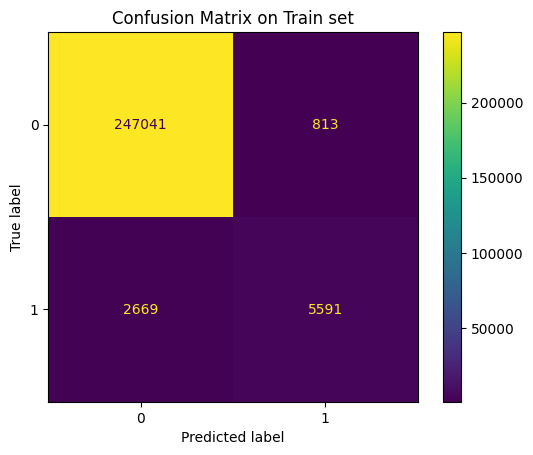

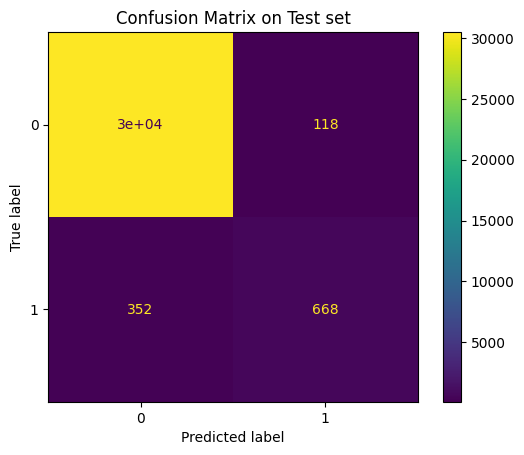

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_forest_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(random_forest_gridsearch, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'random_forest', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0  logistic_regression  test  0.753796   0.843447  0.681373
1        random_forest  test  0.739756   0.849873  0.654902

#### **7.3. Bagging on Decision tree**

In [ ]:
#bagging_dt.fit(X,Y)

y_pred = bagging_dt.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7510869565217392

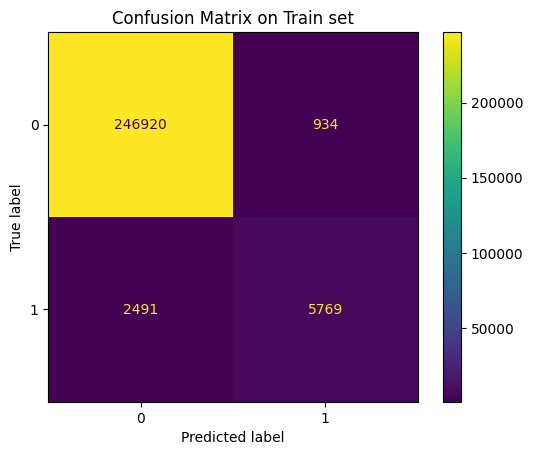

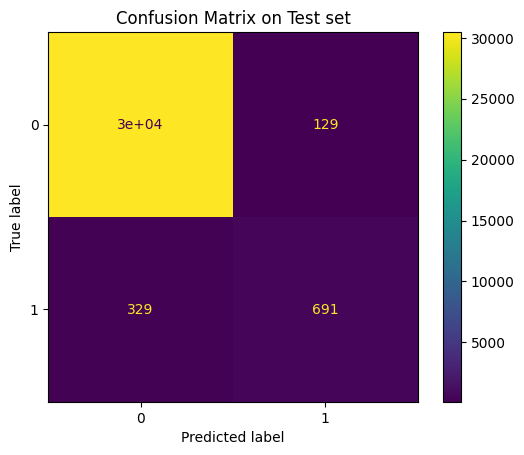

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_dt, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_dt, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'bagging_decision_tree', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0    logistic_regression  test  0.753796   0.843447  0.681373
1          random_forest  test  0.739756   0.849873  0.654902
2  bagging_decision_tree  test  0.751087   0.842683  0.677451

#### **7.4. Bagging on logistic regression with grid search**

In [ ]:
#bagging_logreg_gridsearch.fit(X,Y)

y_pred = bagging_logreg_gridsearch.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7537960954446855

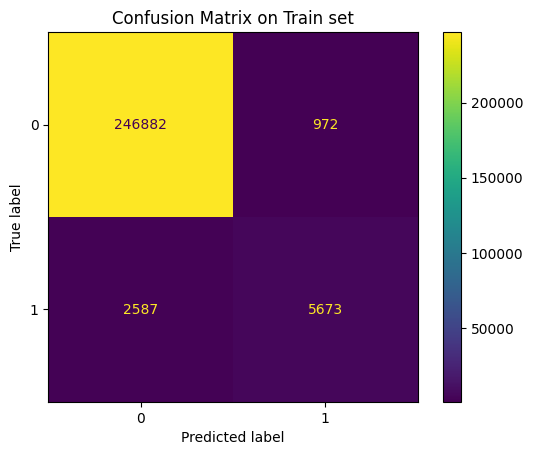

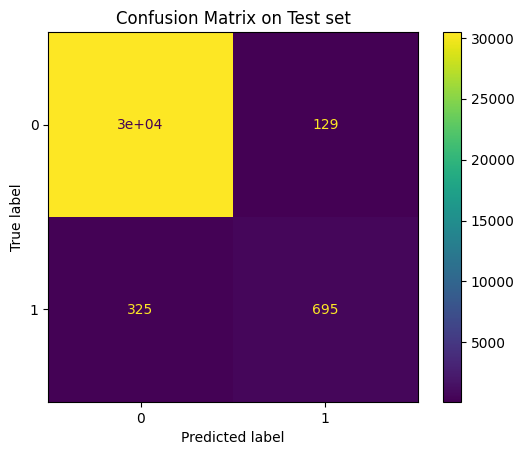

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_logreg_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bagging_logreg_gridsearch, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'bagging_logistic_regression', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0          logistic_regression  test  0.753796   0.843447  0.681373
1                random_forest  test  0.739756   0.849873  0.654902
2        bagging_decision_tree  test  0.751087   0.842683  0.677451
3  bagging_logistic_regression  test  0.753796   0.843447  0.681373

#### **7.5. Adaboost on Decision tree with grid search**

In [ ]:
#adaboost_dt_gridsearch.fit(X,Y)

y_pred = adaboost_dt_gridsearch.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7403314917127072

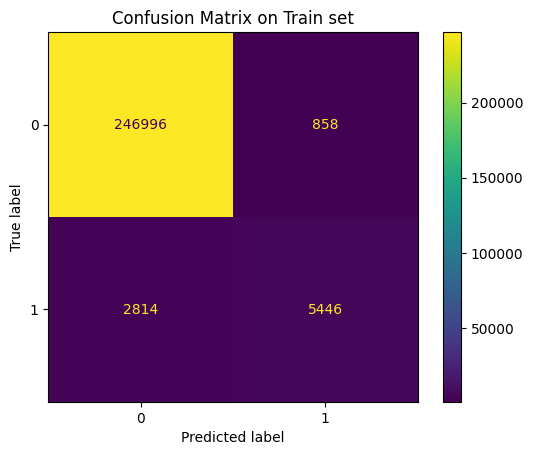

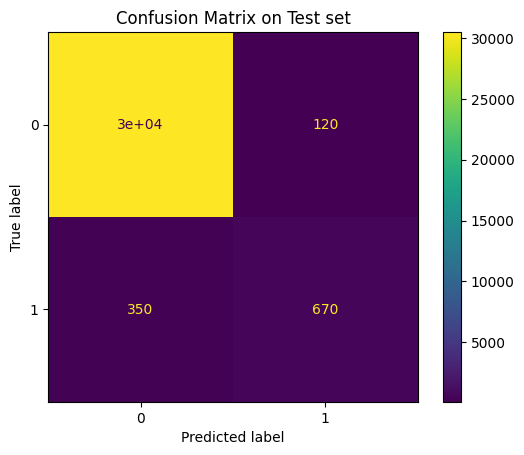

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(adaboost_dt_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(adaboost_dt_gridsearch, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'adaboost_decision_tree', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0          logistic_regression  test  0.753796   0.843447  0.681373
1                random_forest  test  0.739756   0.849873  0.654902
2        bagging_decision_tree  test  0.751087   0.842683  0.677451
3  bagging_logistic_regression  test  0.753796   0.843447  0.681373
4       adaboost_decision_tree  test  0.740331   0.848101  0.656863

#### **7.6. Gradient Boost with grid search**

In [ ]:
#gradientboost_gridsearch.fit(X,Y)

y_pred = gradientboost_gridsearch.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7433333333333333

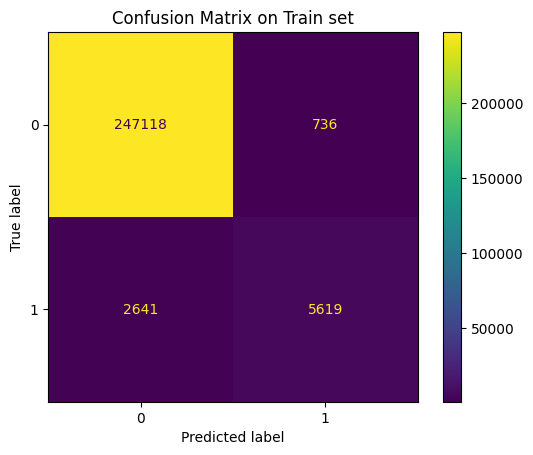

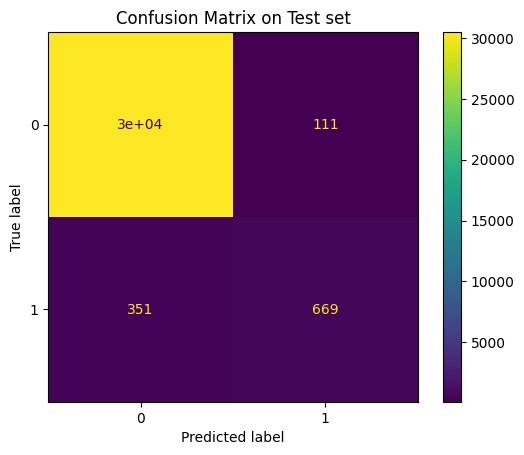

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gradientboost_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gradientboost_gridsearch, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'Gradientboost', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0          logistic_regression  test  0.753796   0.843447  0.681373
1                random_forest  test  0.739756   0.849873  0.654902
2        bagging_decision_tree  test  0.751087   0.842683  0.677451
3  bagging_logistic_regression  test  0.753796   0.843447  0.681373
4       adaboost_decision_tree  test  0.740331   0.848101  0.656863
5                Gradientboost  test  0.743333   0.857692  0.655882

#### **7.7. XG Boost with grid search**

In [ ]:
#xgboost_gridsearch.fit(X,Y)

y_pred = xgboost_gridsearch.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7619047619047619

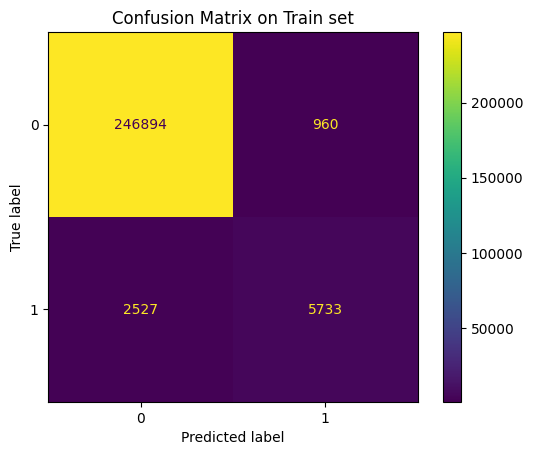

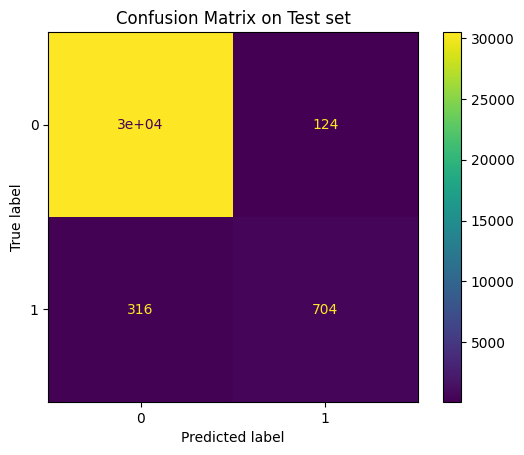

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgboost_gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgboost_gridsearch, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'XGboost', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0          logistic_regression  test  0.753796   0.843447  0.681373
1                random_forest  test  0.739756   0.849873  0.654902
2        bagging_decision_tree  test  0.751087   0.842683  0.677451
3  bagging_logistic_regression  test  0.753796   0.843447  0.681373
4       adaboost_decision_tree  test  0.740331   0.848101  0.656863
5                Gradientboost  test  0.743333   0.857692  0.655882
6                      XGboost  test  0.761905   0.850242  0.690196

#### **7.8. Voting**

In [ ]:
#voting.fit(X,Y)

y_pred = voting.predict(X_data_test)
f1_score(y_data_test, y_pred)

0.7529923830250272

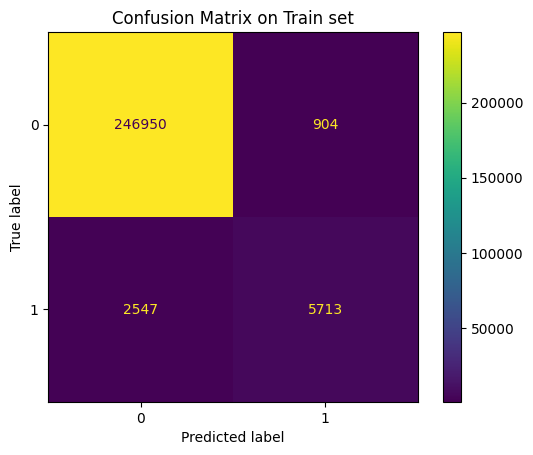

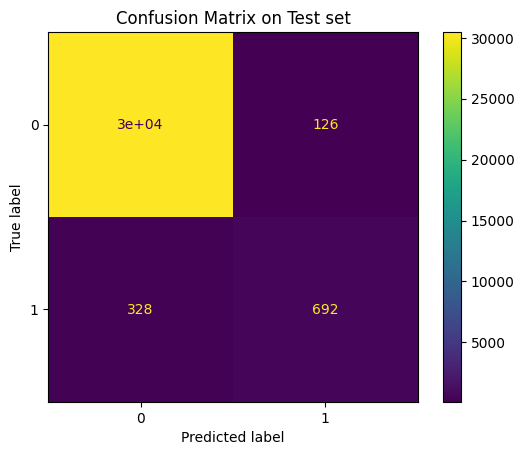

In [ ]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(voting, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(voting, X_data_test, y_data_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
new_rows = [
    {'model': 'Voting', 'set': 'test', 'f1-score': f1_score(y_data_test, y_pred), 'precision': precision_score(y_data_test, y_pred), 'recall' : recall_score(y_data_test, y_pred)}
]

scores_challenge_df = pd.concat([scores_challenge_df, pd.DataFrame(new_rows)], ignore_index=True)
scores_challenge_df

model   set  f1-score  precision    recall
0          logistic_regression  test  0.753796   0.843447  0.681373
1                random_forest  test  0.739756   0.849873  0.654902
2        bagging_decision_tree  test  0.751087   0.842683  0.677451
3  bagging_logistic_regression  test  0.753796   0.843447  0.681373
4       adaboost_decision_tree  test  0.740331   0.848101  0.656863
5                Gradientboost  test  0.743333   0.857692  0.655882
6                      XGboost  test  0.761905   0.850242  0.690196
7                       Voting  test  0.752992   0.845966  0.678431

#### **7.9. Compare models**

In [ ]:
scores_challenge_df = scores_challenge_df.sort_values(by = ['set', 'f1-score'], ascending = False)
scores_challenge_df

model   set  f1-score  precision    recall
6                      XGboost  test  0.761905   0.850242  0.690196
0          logistic_regression  test  0.753796   0.843447  0.681373
3  bagging_logistic_regression  test  0.753796   0.843447  0.681373
7                       Voting  test  0.752992   0.845966  0.678431
2        bagging_decision_tree  test  0.751087   0.842683  0.677451
5                Gradientboost  test  0.743333   0.857692  0.655882
4       adaboost_decision_tree  test  0.740331   0.848101  0.656863
1                random_forest  test  0.739756   0.849873  0.654902

In [ ]:
fig = px.bar(scores_challenge_df, x="model", y='f1-score', color='set', barmode='group', width=900,
             text='f1-score')

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')  # Format and position text
fig.show()

- XGBoost achieved better performance than logistic regression on the challenge test set. The voting model did not enhance the results.

#### **7.10. Retrain models on full dataset**

In [ ]:
'''
# Create a list of models
models = [
    classifier,
    random_forest_gridsearch,
    bagging_dt,
    bagging_logreg_gridsearch,
    adaboost_dt_gridsearch,
    gradientboost_gridsearch,
    xgboost_gridsearch,
    voting
]

# Iterate through the models
for model in models:
    print(f"Training {model}...")
    model.fit(X, Y)  # Train the model

    y_pred = model.predict(X_data_test)  # Make predictions
    f1 = f1_score(y_data_test, y_pred)  # Calculate f1-score

    print(f"F1-score for {model}: {f1:.4f}")
    print("-" * 20)  # Separator for better readability
    '''

## **Part 4: Coefficient analysis and results interpretation**

In [ ]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Access feature importances from the best estimator
importances = xgboost_gridsearch.best_estimator_.feature_importances_

# Create a DataFrame for the feature importances
coef_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
coef_df = coef_df.sort_values(by=['Importance'], ascending=False)

# Reset index
coef_df = coef_df.reset_index(drop=True)
print(coef_df)

                    Feature  Importance
0  num__total_pages_visited    0.789479
1           cat__new_user_1    0.136120
2      cat__country_Germany    0.025050
3           cat__country_UK    0.017391
4           cat__country_US    0.013790
5                  num__age    0.010735
6        cat__source_Direct    0.004409
7           cat__source_Seo    0.003026


In [ ]:
# Create the bar chart
fig = px.bar(coef_df, x='Feature', y='Importance',
             title='XGboost Coefficients',
             labels={'Feature': 'Feature', 'Importance': 'Importance Value'})
fig.show()

In [ ]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Access feature importances (coefficients) from the best estimator
importances = xgboost_gridsearch.best_estimator_.feature_importances_

# Create the equation string
equation = "Conversion Score = "
for i, feature in enumerate(feature_names):
    equation += f"{importances[i]:.4f} * {feature} + "

# Remove the trailing " + " and add the intercept (bias)
equation = equation[:-3] + f" + {xgboost_gridsearch.best_estimator_.intercept_[0]:.4f}"

print(equation)

Conversion Score = 0.0107 * num__age + 0.7895 * num__total_pages_visited + 0.0250 * cat__country_Germany + 0.0174 * cat__country_UK + 0.0138 * cat__country_US + 0.1361 * cat__new_user_1 + 0.0044 * cat__source_Direct + 0.0030 * cat__source_Seo + 0.1334


- The equation represents the logistic regression-like formula derived from XGBoost model. It essentially combines the feature values with their respective coefficients to produce a prediction score. This score is then transformed into a probability using the sigmoid function. Understanding this equation provides insight into how the model weighs different features when making predictions.

- Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team?

'Total_pages_visited' is the most impactful feature followed by far by 'new user' feature and 'country' feature. A 'new_user' has a higher impact on conversion rate then an 'old user'. China has the lowest impact on conversion rate compared to the other countries. 'Source' feature is the less impactful. So the best would be to work on the total pages visited. Since, the conversion rate increase with the number of pages visited, it's important to put the maximum effort on the first pages and make them more attractive in term of information.  